Author:Aminath Shausan
    
This program visualizes and perform correlation analyses of Google Trends and influenza data 

In [ ]:
import pandas as pd
import numpy as np
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

import seaborn as sns
from matplotlib import pyplot as plt

path = '/<PUT PATH TO FOLDER>/Digital-Disease-Surveillance'

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Read processed data and visualise

In [ ]:
df_all = pd.read_csv(path + '/data/gt_flu.csv')

print(df_all.shape)
print(df_all.info())
df_all.head()

(2088, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               2088 non-null   object 
 1   Year_x                             2088 non-null   int64  
 2   State                              2088 non-null   object 
 3   influenza                          2088 non-null   int64  
 4   Haemophilus influenzae             2088 non-null   int64  
 5   flu                                1827 non-null   float64
 6   parainfluenza                      2088 non-null   int64  
 7   H1N1                               2088 non-null   int64  
 8   H7N9                               2088 non-null   int64  
 9   H5N1                               2088 non-null   int64  
 10  H3N2                               2088 non-null   int64  
 11  grippe                             2088 non-n

,date,Year_x,State,influenza,Haemophilus influenzae,flu,parainfluenza,H1N1,H7N9,H5N1,...,pneumonia,bronchitis,H9N2,sinusitis,upper respiratory tract infection,Tamiflu,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,7/1/2018,2018,ACT,0,0,4.0,0,100,28,0,...,0,0,0,54.0,0,0,NaN,NaN,NaN,NaN
1,14/1/2018,2018,ACT,19,0,6.0,20,0,0,24,...,0,0,0,19.0,0,92,NaN,NaN,NaN,NaN
2,21/1/2018,2018,ACT,0,0,8.0,0,0,32,0,...,0,0,0,0.0,0,90,NaN,NaN,NaN,NaN
3,28/1/2018,2018,ACT,0,0,11.0,0,36,0,0,...,0,0,0,0.0,0,0,NaN,NaN,NaN,NaN
4,4/2/2018,2018,ACT,0,0,3.0,0,0,41,0,...,0,0,0,0.0,0,0,NaN,NaN,NaN,NaN


- Drop rows with State = ACT and year = 2022 as there are no flu data recorded for these rows. 
- drop unwanted columns: 'Week', 'Year_y', 'Popn'

In [ ]:

df_drop = df_all[~(df_all['State'] == 'ACT') & ~(df_all['Year_x'].isin([2022,2023]))]

print(df_drop.shape) #(1456, 29)
print(df_all.shape)
print(df_drop['State'].unique())
print(df_drop['Year_x'].unique())
# print(df_all.info())

#drop unwanted columns:
df_drop = df_drop.drop(['Week', 'Year_y', 'Popn'], axis=1)
print(df_drop.shape)
print(df_drop['Year_x'].unique())
df_drop.head()

(1456, 29)
(2088, 29)
['NSW' 'NT' 'QLD' 'SA' 'TAS' 'VIC' 'WA']
[2018 2019 2020 2021]


KeyError: "['Week', 'Year_y', 'Popn'] not found in axis"

- check for missing values in 'totalCount' column (this is total count of flu for the week) and replace with 0
- Note: for NT, there are no GT data for keywords 'flu' and 'sinusitis'

In [ ]:
#check for missing values in 'totalCount' column (this is total count of flu for the week) 
#and replace with 0 
df_drop.describe()
#check for nan values 
print(df_drop.isnull().sum()) 
df_drop["totalCount"] = df_drop["totalCount"].fillna(0)
print(df_drop.isnull().sum()) 

date                                   0
Year_x                                 0
State                                  0
influenza                              0
Haemophilus influenzae                 0
flu                                  208
parainfluenza                          0
H1N1                                   0
H7N9                                   0
H5N1                                   0
H3N2                                   0
grippe                                 0
gripe                                  0
adenovirus                             0
rhinovirus                             0
respiratory syncytial virus            0
metapneumovirus                        0
Bordetella pertussis                   0
Mycoplasma pneumoniae                  0
pneumonia                              0
bronchitis                             0
H9N2                                   0
sinusitis                            208
upper respiratory tract infection      0
Tamiflu         

- convert date column into date object

In [ ]:
df_drop['date'] = pd.to_datetime(df_drop['date'], format = '%Y-%m-%d') #, 
print(df_drop.iloc[0,0]) 
print(type(df_drop.iloc[0,0])) 
df_drop.dtypes

2018-01-07 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


date                                 datetime64[ns]
Year_x                                        int64
State                                        object
influenza                                     int64
Haemophilus influenzae                        int64
flu                                         float64
parainfluenza                                 int64
H1N1                                          int64
H7N9                                          int64
H5N1                                          int64
H3N2                                          int64
grippe                                        int64
gripe                                         int64
adenovirus                                    int64
rhinovirus                                    int64
respiratory syncytial virus                   int64
metapneumovirus                               int64
Bordetella pertussis                          int64
Mycoplasma pneumoniae                         int64
pneumonia   

### Plot Trend for each state

### NSW
- 'H9N2' has all 0s so can ignore this when modelling 
- Actual flu cases appears to be significantly low after 29/3/2020. 

### NT
- 'flu' and 'sinusitis' has all missing values so can ignore these when modelling 
- apart from these search terms all others have 0 values. so ignore them during modelling: 
influenza, H1N1, rhinovirus, pneumonia, bronchitis, Tamiflu  
- Actual flu cases appears to be significantly low after 29/3/2020.

### QLD
-  'H9N2' has all 0s so can ignore this when modelling 
- Actual flu cases appears to be significantly low after 29/3/2020.

### SA
-  'H9N2' and 'Bordetella pertussis' has all 0s so can ignore this when modelling 
- Actual flu cases appears to be significantly low after 29/3/2020.

### TAS
-  'Haemophilus influenzae', 'H3N2', 'grippe', 'Bordetella pertussis', 'Mycoplasma pneumoniae', 'H9N2', 'upper respiratory tract infection'   has all 0s so can ignore these when modelling 
- Actual flu cases appears to be significantly low after 29/3/2020.


### VIC
 
- Actual flu cases appears to be significantly low after 29/3/2020.

### WA
-  'H9N2' and 'Bordetella pertussis' has all 0s so can ignore this when modelling 
- Actual flu cases appears to be significantly low after 29/3/2020.


In [ ]:
# ['NSW' 'NT' 'QLD' 'SA' 'TAS' 'VIC' 'WA']
#first get state data
df_state = df_drop[df_drop['State']== 'SA']
print(df_state.shape) #(208, 26)
print(df_state['State'].unique())
# print(df_nsw.dtypes)
print(df_state.isnull().values.sum()) #check any missing values  
# df_state =df_state.drop(['flu', 'sinusitis'], axis=1) #drop cols with all missing values
# print(df_state.isnull().sum())

# df_state.to_csv(path + '/data/wa_gt_flu_.csv', index=False)


(208, 26)
['SA']
0


# Yearly Correlation

In [199]:
#define a function to compute correlation for each state per year
def corr_state_yrly(state, year):     
   
    cols = list(range(3, 26))
    # i = 1
    #filter data for state and year
    df_state_yr = df_drop[(df_drop['State']== state) &  (df_drop['Year_x']== year)]
    #compute correlation matrix
    df_corr_yrly= df_state_yr.iloc[: , cols].copy()
    corrM = df_corr_yrly.corr()[['totalCount']].round(2)
    corrM.rename(columns={corrM.columns[0]: str(year)},inplace=True)
    print(corrM.shape)
    
    return corrM #df_state

In [ ]:
df_corr1 = corr_state_yrly('NSW', 2018)
df_corr2 = corr_state_yrly('NSW', 2019)
df_corr3 = corr_state_yrly('NSW', 2020)
df_corr4 = corr_state_yrly('NSW', 2021)
# print(df_corr['State'].unique())
# print(df_corr['Year_x'].unique())
# df_corr
#concatenate the dfs
df_concat = pd.concat([df_corr1, df_corr2, df_corr3, df_corr4], axis=1)
print(df_concat.shape)

df_concat

(23, 1)
(23, 1)
(23, 1)
(23, 1)
(23, 4)


,2018,2019,2020,2021
influenza,0.23,0.95,0.52,-0.06
Haemophilus influenzae,0.15,-0.07,0.13,-0.18
flu,-0.33,0.46,0.33,0.06
parainfluenza,0.23,0.07,0.35,-0.00
H1N1,-0.11,0.12,0.69,-0.05
H7N9,0.36,0.25,0.24,0.01
H5N1,-0.15,0.25,0.35,0.07
H3N2,0.12,0.09,-0.03,0.03
grippe,-0.04,-0.10,0.15,-0.20
gripe,0.01,0.26,0.08,0.11


## Plot correlation matrix for all states 
#### Date: April 2024

In [ ]:
#read each state data and combine NNDD data (totalCount column)
def read_data(state, stateName):
    ###################
    #state = name of state
    #drops = list of columns to drop
    #########################
    df = pd.read_csv(path + '/data/combined/'+ state + '_gt_flu_.csv')
    print('df shape prior:', df.shape)
    df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d') #convert to date object
    df= df[df['date']< '2020-01-01'] #exclude covid period ((104, 26)
    df['totalCount_scaled']= (df['totalCount'] - df['totalCount'].min()) / (df['totalCount'].max() - y.min())*100 #scale  between [0 100]
    print('df shape after:', df.shape)
    if state == 'nt':
        cols = list(range(3, 24)) 
    else:
        cols = list(range(3, 26)) #select cols to compute correlation (for NT, use (3, 24)
    df_corr= df.iloc[: , cols].copy() 
    corr_mat = df_corr.corr() #compute correlation matrix
    corr_mat_sub = corr_mat[['totalCount']].rename(columns ={'totalCount':stateName}) #get only NNDD influenza column

    
    return df, corr_mat_sub


In [128]:
# del(df_corr_comb_tas, df_corr_comb_nt, df_corr_comb_sa, df_corr_comb_wa, df_corr_comb_qld, df_corr_comb_vic, df_corr_comb_nsw)
# del(df_nt)
del(df_nsw, df_corr_comb_nsw)

In [136]:
lst_state = ['nsw', 'vic', 'qld', 'wa', 'sa', 'nt', 'tas']
lst_stateName = ['NSW', 'VIC', 'QLD', 'WA', 'SA', 'NT', 'TAS']
 
# state = 'tas'
# stateName = 'TAS'
df_nsw, df_corr_comb_nsw = read_data(lst_state[0], lst_stateName[0])
df_vic, df_corr_comb_vic = read_data(lst_state[1], lst_stateName[1])
df_qld, df_corr_comb_qld = read_data(lst_state[2], lst_stateName[2])
df_wa, df_corr_comb_wa = read_data(lst_state[3], lst_stateName[3])
df_sa, df_corr_comb_sa = read_data(lst_state[4], lst_stateName[4])
df_nt, df_corr_comb_nt = read_data(lst_state[5], lst_stateName[5]) #for nt use col = (2, 24)
df_tas, df_corr_comb_tas = read_data(lst_state[6], lst_stateName[6])
# df_corr_comb_nt
df_corr_comb_sa

df shape prior: (208, 26)
df shape after: (104, 27)
df shape prior: (208, 26)
df shape after: (104, 27)
df shape prior: (208, 26)
df shape after: (104, 27)
df shape prior: (208, 26)
df shape after: (104, 27)
df shape prior: (208, 26)
df shape after: (104, 27)
df shape prior: (208, 24)
df shape after: (104, 25)
df shape prior: (208, 26)
df shape after: (104, 27)


,SA
influenza,0.896531
Haemophilus influenzae,0.035656
flu,0.858639
parainfluenza,0.016732
H1N1,0.004339
H7N9,0.081476
H5N1,0.119459
H3N2,-0.027856
grippe,-0.119964
gripe,0.062570


In [138]:
# y = df_nt['totalCount']
# df_nt['totalCount_scaled']= (df_nt['totalCount'] - df_nt['totalCount'].min()) / (df_nt['totalCount'].max() - y.min())*100
# df_nt[['totalCount_scaled']].describe()
del(df_corr_comb_all)

In [139]:
df_corr_comb_all =  pd.concat([df_corr_comb, df_corr_comb_vic, df_corr_comb_qld, df_corr_comb_wa,
                              df_corr_comb_sa, df_corr_comb_nt, df_corr_comb_tas], 
                              axis=1) #pd.merge(df_corr_comb, df_corr_comb_vic, on='index')

print(df_corr_comb_all.shape)
df_corr_comb_all
# df_corr_comb_all.to_csv(path + '/data/combined/corr_gt_flu_allstates.csv', index=True) #save correlation matrix

# type(df_corr_comb)
# df_corr_comb.index

(24, 7)


,NSW,VIC,QLD,WA,SA,NT,TAS
influenza,0.944568,0.901316,0.940958,0.917598,0.896531,0.050753,0.280862
Haemophilus influenzae,-0.030398,0.130136,0.038177,0.132452,0.035656,NaN,NaN
flu,0.386312,0.427035,0.310888,0.751590,0.858639,NaN,0.328810
parainfluenza,0.135809,0.167915,0.014022,0.093214,0.016732,NaN,0.053116
H1N1,0.067468,0.100654,-0.079101,-0.015772,0.004339,-0.078046,-0.061455
H7N9,0.031933,-0.026894,-0.160788,-0.035294,0.081476,NaN,-0.098455
H5N1,0.169158,-0.084748,0.004046,-0.075175,0.119459,NaN,-0.037458
H3N2,0.037241,-0.087124,-0.083111,-0.125540,-0.027856,NaN,NaN
grippe,-0.140588,0.023187,0.047260,0.017354,-0.119964,NaN,NaN
gripe,0.170754,-0.048008,0.150240,0.070522,0.062570,NaN,0.024823


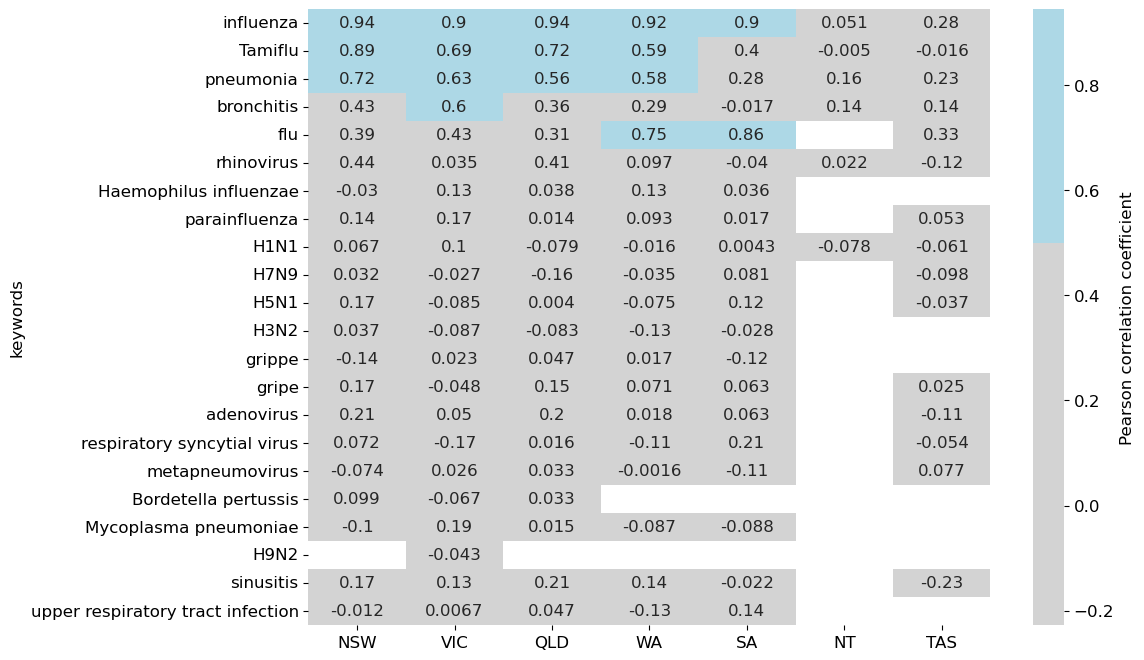

In [ ]:
# #plot correlation matrix 
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams['font.size'] = 12
plt.rcParams["font.family"] = "sans-serif"

# df_corr_comb_all = pd.read_csv(path + '/data/combined/'+ state + '_gt_flu_.csv')
df_plot = df_corr_comb_all.copy()
df_plot.drop(df_plot.tail(1).index,inplace=True) #drop last row
# sns.color_palette("pastel")
plt.figure(figsize=(11,8))
# sns.heatmap(df_plot, cmap='BuPu',center = 0.5, annot=True)
sns.heatmap(df_plot, cmap=['lightgrey', 'lightblue'],center = 0.5, annot=True, cbar_kws={'label': 'Pearson correlation coefficient'})
# plt.savefig(path + '/fig_paper/Fig2_corr.svg', dpi=300,bbox_inches='tight')  
plt.show()
# df_plot
